# Linear Regression with SciKit-Learn

قبلا تونستیم روی این دیتا  ها یک مدل خطی ساده با یک متغیر را فیت کنیم اما حالا می خوایم توسط این کتابخونه با مسائل چند متغیره و در نظر گرفتن موارد بیشتر از جمله ارزیابی عملکرد مدل و غیره بپردازیم

## فراخوانی کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## درباره دیتا
این دیتا میگه به ازای چقدر خرج کردن در پلتفرم های مختلف، یعنی تلوزیون، رادیو و روزنامه، چه قدر فروش داشتیم


In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### بیان صورت مسئله
قبلا رابطه ی بین کل مقادیر خرج شده برای تبلیغات و فروش را بررسی کردیم. اکنون می خوایم رابطه ی هر یک از کانال های تبلیغاتی تلوزیون، رادیو و روزنامه را با فروش بررسی کنیم



### مسئله چند متغیره
رابطه ی هر یک از متغیر ها را با فروش به تصویر در می آوریم

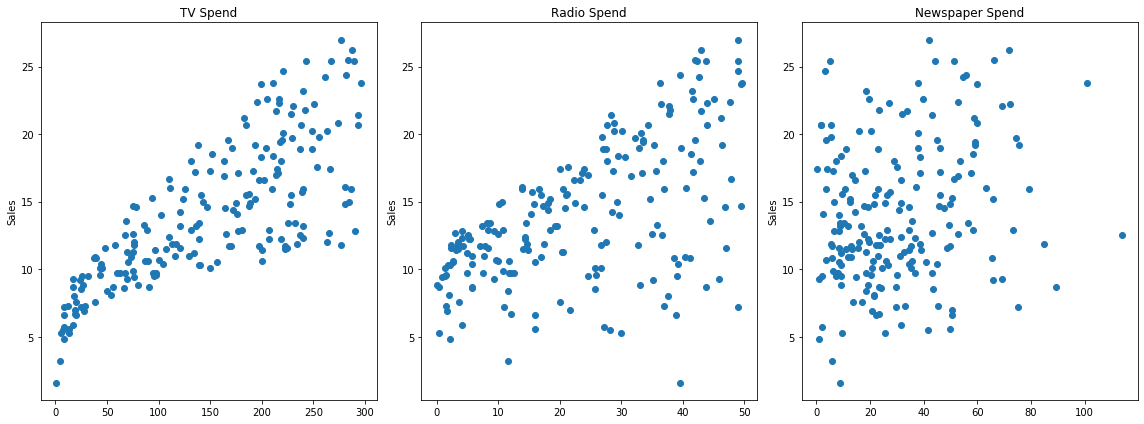

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

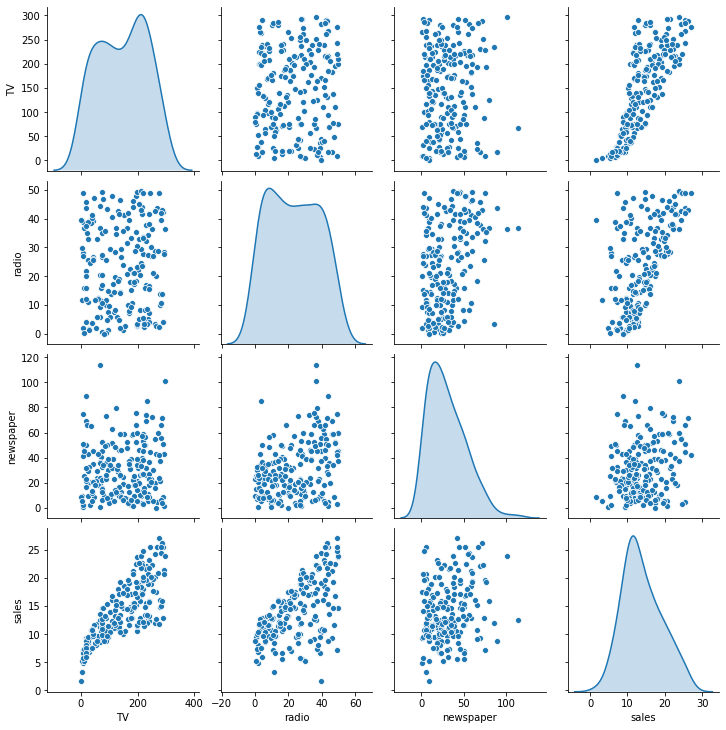

In [5]:
# کاری که در بالا انجام دادیم به شکل ساده تری توسط این کتابخوانه قابل انجام می باشد
sns.pairplot(df,diag_kind='kde')

## Setting X and Y Values

متغیر های مسئله به همراه خروجی را در داده ها مشخص می کنیم

In [6]:
X = df.drop('sales',axis=1)
y = df['sales']

## Train | Test Split

دیتا ها را به دو دسته، یعنی ترین و تست تقسیم می کنیم تا بتوانیم در ادامه کارکرد صحیح مدلمان را با داده های تست ارزیابی کنیم

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# پارامتر سوم: حجم داده های تست را از کل داده ها دریافت می کند
# پارامتر چهارم: باعث می شود اعداد یکسانی در تقسیم داده ها دریافت کنیم
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [10]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [11]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [199]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Creating a Model (Estimator)
حالا اقدام به ساخت مدل می کنیم

#### استخراج مدل مطلوب از خانواده مدل خطی

In [18]:
from sklearn.linear_model import LinearRegression

#### ساخت مدل به همراه پارامتر های آن در صورت نیاز

In [19]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [20]:
model = LinearRegression()

### Fit/Train the Model on the training data

**روی داده های ترین، مدل را فیت می کنیم تا به پارامتر های ایده آل برسیم**

In [21]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# فهم و بهینه سازی مدل

-----

## ارزیابی مدل تشکیل شده توسط داده های تست

### انواع شاخص ها

برای مسائلی که خروجی پیوسته دارند و یادگیری آن ها باناظر است می توان از شاخص های زیر برای ارزیابی استفاده کرد

**Mean Absolute Error** (MAE) قدر مطلق:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) توان 2 و با در نظر گرفتن جریمه برای داده های پرت:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) جدز توان 2 به منظور جریمه و هم واحد شدن آن با متغیر های مسئله:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$



All of these are **loss functions**, because we want to minimize them.

### ارزیابی مدل بر روی داده های تست

مدل باید روی داده هایی که هرگز آن ها را مشاهده نکرده و ازشون الگو نگرفته ارزیابی بشه و داده های تست از ابتدا به این منظور تشکیل شدن

#### پیشبینی خروجی روی داده های تست


In [22]:
# X_test

In [23]:

# در نهایت این مقادیر پیشبینی شده با مقادیر واقعی مقایسه می شوند
test_predictions = model.predict(X_test)

In [24]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

#### استخراج موارد مربوط به شاخص های ارزیابی مدل و پیاده سازی آن ها بر روی مقادیر پیشبینی شده و واقعی


In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [27]:
MAE

1.2137457736144808

In [28]:
MSE

2.298716697886379

In [29]:
RMSE

1.5161519375993882

In [214]:
df['sales'].mean()

14.0225

**به طور کلی صرفا با نگاه کردن به این داده ها نمیتونیم راجع به کارکرد صحیح مدل نتیجه گیری کنیم و همون طور که در تصویر زیر می بینیم ممکنه این شاخص ها نزدیک به صفر هم باشن اما مدل اصلا به خوبی روی داده های فیت نشده باشه و بهتره با استفاده از مفهوم باقی مانده ها و ترسیم برخی از نمودار ها از تصمیم گیری صحیح خودمون اطمینان حاصل کنیم**


## Residuals
## باقیمانده ها
به معنی اختلاف بین مقادیر پیشبینی شده و واقعی می باشد

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

برای فهم مفهوم باقیمانده ها مثالی را بررسی می کنیم

In [30]:
quartet = pd.read_csv('anscombes_quartet1.csv')

خط قرمز بیانگر مقدار پیشبینی شده و نقطه ها مقادیر واقعی هستند

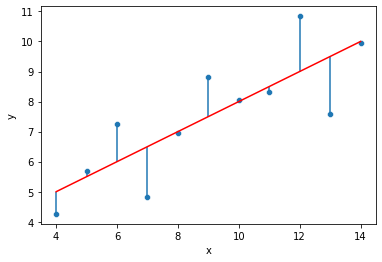

In [216]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

### روش ترسیم هیستوگرام باقیمانده ها
بعد از تشکیل مقادیر باقیمانده، نمودار هیستوگرام آن را رسم می کنیم، اگر این نمودار از توزیع نرمال و با میانگین تقریبی صفر تبعیت کرد نشانه ی خوبی است


<AxesSubplot:xlabel='residual', ylabel='Density'>

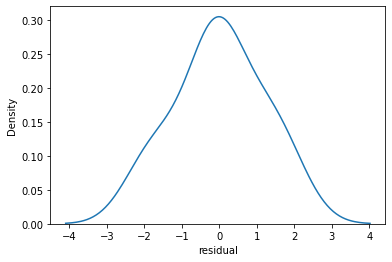

In [217]:
sns.kdeplot(quartet['residual'])

###  روش ترسیم  باقیمانده ها در مقابل مقادیر واقعی
اگر در این نمودار الگوی معنا داری وجود نداشت نشانه خوبی است

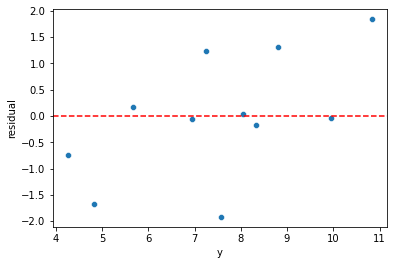

In [218]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

---

**در بالا یک نمونه خوب را مشاهده کردیم، در ادامه نمونه هایی از مدل هایی با خطای بالا را بررسی می کنیم**

In [40]:
quartet = pd.read_csv('anscombes_quartet2.csv')

In [41]:
quartet.columns = ['x','y']

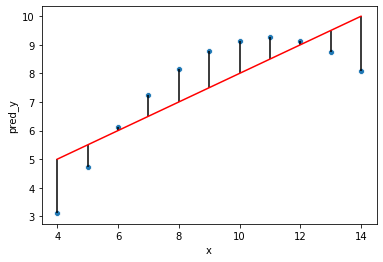

In [42]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

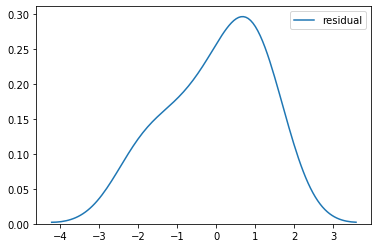

In [43]:
sns.kdeplot(quartet['residual'])

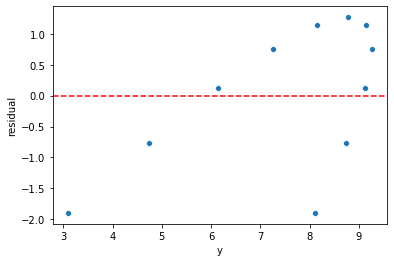

In [35]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

همانطور که مشاهده شد، الگو خاصی در نمودار بالا مشهود است و این نشان از خوب کار نکردن مدل دارد

In [44]:
quartet = pd.read_csv('anscombes_quartet4.csv')

In [45]:
quartet

,x,y
0,8.0,6.58
1,8.0,5.76
2,8.0,7.71
3,8.0,8.84
4,8.0,8.47
5,8.0,7.04
6,8.0,5.25
7,19.0,12.50
8,8.0,5.56
9,8.0,7.91


In [46]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']

In [47]:
quartet['residual'] = quartet['y'] - quartet['pred_y']

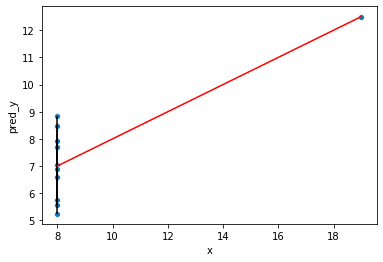

In [48]:
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

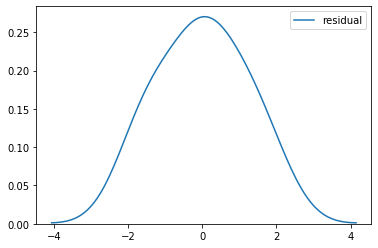

In [49]:
sns.kdeplot(quartet['residual'])

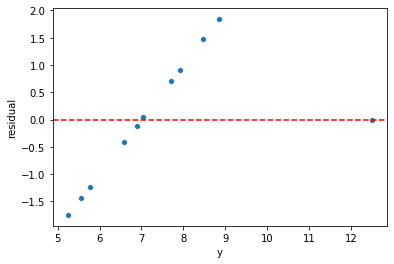

In [50]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

### رسم باقیمانده ها در مسئله اصلی



In [51]:
# تشکیل مقادیر پیشبینی شده
test_predictions = model.predict(X_test)

In [52]:
# تشکیل باقیمانده ها
test_res = y_test - test_predictions

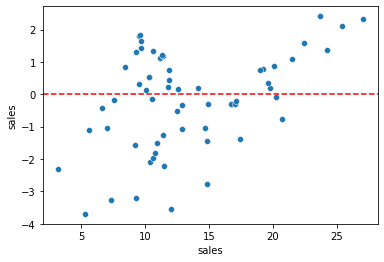

In [233]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

الگوی خاصی مشاهده نمی شود و این نشانه خوبی است و در ادامه از نرمال بودن نمودار هیستوگرام باقیمانده ها اطمینان حاصل می کنیم


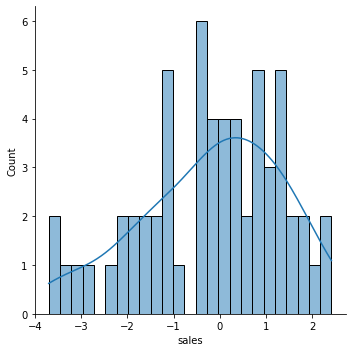

In [235]:
sns.displot(test_res,bins=25,kde=True)

###  اطمینان از نرمال بودن توزیع
### Q–Q plot
این نمودار به ما کمک می کند که توزیع باقیمانده ها را با توزیع نرمال مقایسه کنیم و در صورت نزدیک بودن الگو ها به هم می توانیم از نرمال بودن توزیع اطمینان حاصل کنیم

In [53]:
import scipy as sp

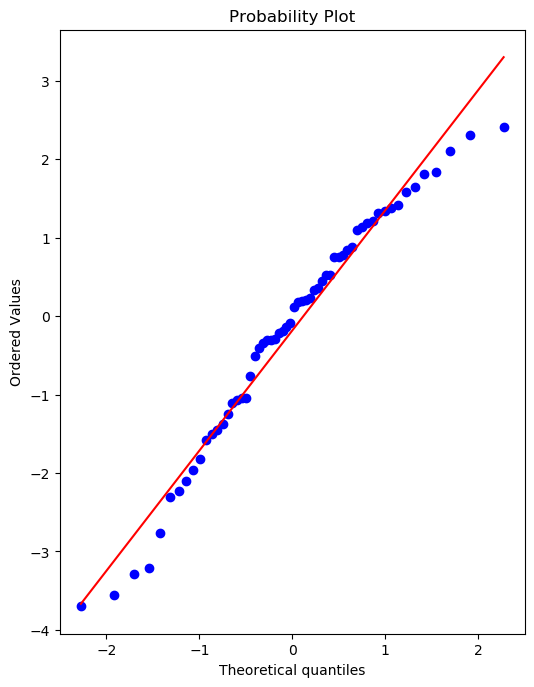

In [54]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

-----------

## فیت کردن مدل نهایی روی همه دیتا ها

بعد از این که از کارکرد مدلمون مطمئن شدیم، مجددا باید مدل را روی همه داده ها فیت کنیم

In [55]:
final_model = LinearRegression()

In [56]:
final_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

توجه کنید که در اینجا دیگه نیازی به محاسبه مجدد شاخص ها نیست چون پیشتر از کارکرد مدلمون اطمینان حاصل کردیم

## توسعه مدل

### مشاهده نهایی

برای مشاهده کارکرد مدل نهایی می تونیم مجددا برخی اقدامات قبل را انجام دهیم

In [57]:
y_hat = final_model.predict(X)

### Residuals

Should be normally distributed as discussed in the video.

In [58]:
residuals = y_hat - y

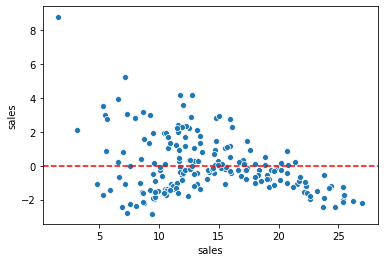

In [59]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### مشاهده ضرایب مدل

In [60]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [61]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037



### تفسیر ضرایب

با توجه به این که همه ی متغیر ها هم واحد هستند متوجه می شویم تبلیغات رادیویی بیشترین اثر را در فروش و روزنامه کمترین اثر را دارد. چه بسا این اثر می تواند منفی نیز باشد. اگر متغیر ها هم واحد نبودند باید پیش از فیت کردن مدل، متغیر ها را استاندارد سازی کنیم که این مفهوم در ادامه توضیح داده خواهد شد 


### پیشبینی روی داده های جدید

حالا مدلی داریم که می توانیم با وارد کردن متغیر های ورودی آن پیشبینی دقیقی از خروجی داشته باشیم. برای مثال فرض کنید برای یک کمپین تبلیغاتی جدید می خواهیم 149 واحد در تلوزیون، 22 واحد در رادیو و 12 واحد در روزنامه هزینه کنیم.چه قدر فروش خواهیم داشت

In [62]:
campaign = [[149,22,12]]

In [63]:
final_model.predict(campaign)

array([13.893032])

-----

## ذخیره و لود کردن مدل

In [64]:
from joblib import dump, load

In [65]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [66]:
loaded_model = load('sales_model.joblib')

In [67]:
loaded_model.predict(campaign)

array([13.893032])

## در ادامه
### در ادامه با مفهوم رگولاریزیشن آشنا می شویم

-------
--------